## Importacion de los datos

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('alimentos.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fecha              276 non-null    object 
 1   Hora               276 non-null    object 
 2   Nombre             276 non-null    object 
 3   Calorias (Cal)     276 non-null    int64  
 4   Carbohidratos (g)  276 non-null    float64
 5   Lipidos (g)        276 non-null    float64
 6   Proteinas (g)      276 non-null    float64
 7   Sodio (g)          276 non-null    float64
 8   Sodio (mg)         276 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 19.5+ KB
None


## Seleccion de datos

In [465]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [466]:
# El modelo predecira la cantida de calorias de un alimento a partir del contenido de carbohidratos, lipidos, proteinas y sodio del mismo; de este modo eliminamos las demas columnas, no necesarias
# Eliminamos las columnas que no necesitamos
data = data.drop(['Fecha', 'Hora', 'Nombre', 'Sodio (mg)'], axis=1)

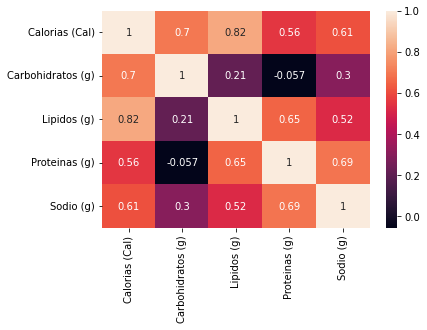

In [467]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

A partir de la matriz de correlacion podemos observar que las 2 variables independientes que más aportan información son los Carbohidratos y los Lípidos, es por ello que se seleccionan para realizar un primer modelo.

In [468]:
# Realizamos una seleccion aleatoria de datos para entrenamiento, validacion y prueba: entrenamiento (60%), validacion (20%) y prueba (20%))
columns = ['Calorias (Cal)', 'Carbohidratos (g)', 'Lipidos (g)', 'Proteinas (g)', 'Sodio (g)']

# Separacion variables independientes y dependiente
x = data[columns[1:]]
y = data[columns[0]]

# Separación de los datos de entrenamiento.
x_train, x_aux, y_train, y_aux = train_test_split(x, y, train_size = 0.6, random_state = 1)

x_val, x_test, y_val, y_test = train_test_split(x_aux, y_aux, train_size = 0.5, random_state = 1)


print('Total de datos:', len(data))
print('No. de datos de entreamiento:', len(x_train))
print('No. de datos para validacion:', len(x_val))
print('No. de datos para prediccion:', len(x_test))

Total de datos: 276
No. de datos de entreamiento: 165
No. de datos para validacion: 55
No. de datos para prediccion: 56


In [469]:
# Dividimos cada una de las variables dependientes e independientes
x1_train = x_train['Carbohidratos (g)']
x2_train = x_train['Lipidos (g)']

x1_val = x_val['Carbohidratos (g)']
x2_val = x_val['Lipidos (g)']

x1_test = x_test['Carbohidratos (g)']
x2_test = x_test['Lipidos (g)']

# Generacion del Primer Modelo
### Regresión Lineal **Gradiente Descendente**

In [470]:
# Funcion de Hipotesis
h1 = lambda x0, x1, theta: theta[0] + theta[1] *x0 + theta[2] *x1

# Funcion auxiliar (parcial) de la funcion de costo
j_i1 = lambda x0, x1, y, theta: (h1(x0, x1, theta)-y)**2

In [471]:
#[3,5,2,2,2]
# Parametros e hiper-parametro
theta = [1,4,7]
alpha = 0.00000001

n_iter = 30000

In [472]:
# Datos necesarios para las formulas
n_train = len(x_train)
n_val = len(x_val)
n_test = len(x_test)

# Ciclo para iterar n catidad de veces sobre el modelo
for idx in range(n_iter):
  acumDelta0 = []
  acumDelta1 = []
  acumDelta2 = []
  
  for x1, x2, y in zip(x1_train, x2_train, y_train):
    acumDelta0.append(h1(x1, x2, theta) - y)
    acumDelta1.append(h1(x1, x2, theta) - y * x1)
    acumDelta2.append(h1(x1, x2, theta) - y * x2)

  # Sumatoria de los deltas calculados anteriormente, que se emplearan para calcular los nuevos thetas
  sum_j0 = sum(acumDelta0)
  sum_j1 = sum(acumDelta1)
  sum_j2 = sum(acumDelta2)

  # Calculo de los nuevos thetas (coeficientes del modelo)
  theta[0] = theta[0] - alpha / n_train * sum_j0
  theta[1] = theta[1] - alpha / n_train * sum_j1
  theta[2] = theta[2] - alpha / n_train * sum_j2

# Impresion de los thetas obtenidos finalmente
print('Thetas calculados:', theta)

Thetas calculados: [1.002820081419432, 7.242105172328549, 8.174577172328553]


# Validacion del Primer Modelo

In [473]:
# Calculo de Error de los datos de entrenamiento
acum_delta = []
errores = []
for x1, x2, y in zip(x1_train, x2_train, y_train):
  acum_delta.append(j_i1(x1, x2, y, theta)) 

sDelta = sum(acum_delta)  
j_train = 1/(2*n_train) * sDelta
errores.append(j_train)

# Calculo de Error con los datos de validacion
acum_delta = []
for x1, x2, y in zip(x1_val, x2_val, y_val):
  acum_delta.append(j_i1(x1, x2, y, theta))  

sum_delta = sum(acum_delta)  
j_val = 1/(2*n_val)*sum_delta
errores.append(j_val)

# Calculo de Error con los datos de prueba
acum_delta = []
for x1, x2, y in zip(x1_test, x2_test, y_test):
  acum_delta.append(j_i1(x1, x2, y, theta))  

sum_delta = sum(acum_delta)  
j_test = 1/(2*n_test)*sum_delta
errores.append(j_test)

# Impresion del Error con los datos de entrenamiento
print('Error de entrenamiento:', j_train)


# Impresion del Error de validacion
print('Error de validacion:', j_val)

# Impresion del Error de prueba
print('\nError de prueba:', j_test)

Error de entrenamiento: 4444.80598287303
Error de validacion: 4433.134251345204

Error de prueba: 4724.178819453136


# Analisis

Error de entrenamiento: 4509.8597

Error de validacion: 4139.6499

Recordemos que el análisis tiene que ser realizado sobre los datos obtenidos del conjunto de entrenamiento y el de validación.
Como se puede observar el error de entrenamiento es elevado e igualmente para el de validación, esto nos empieza a hacer sugerencias sobre la existencias de un **sesgo/bias** alto, esto se visualiza aún más en la siguiente tabla, donde podemos observar el sesgo exagerado para cada una de las predicciones.

In [474]:
y_pred = round(h1(data['Carbohidratos (g)'], data['Lipidos (g)'], theta))

comp_table = pd.DataFrame({'Real': data['Calorias (Cal)'], 'Prediccion': y_pred, 'Diferencia / Sesgo': data['Calorias (Cal)'] - y_pred})
comp_table.head(10)

,Real,Prediccion,Diferencia / Sesgo
0,400,520.0,-120.0
1,400,520.0,-120.0
2,308,306.0,2.0
3,141,146.0,-5.0
4,141,146.0,-5.0
5,141,146.0,-5.0
6,0,1.0,-1.0
7,630,682.0,-52.0
8,630,682.0,-52.0
9,159,218.0,-59.0


En la siguiente grafica se observa el sesgo de una manera más visual; si nuestros valores predichos fuese iguales a los esperados, obtendriamos una linea perfecta, como la línea punteada que se observa en la siguiente gráfica, sin embargo, observamos los puntos de predicción lejanos a dicha línea, se hace notorio el sesgo existente.

Text(0.5, 0, 'Valor Real')

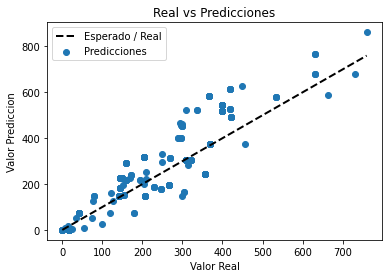

In [475]:
min_val = min(data['Calorias (Cal)'])
max_val = max(data['Calorias (Cal)'])

plt.scatter(data['Calorias (Cal)'], y_pred, label = "Predicciones")
plt.plot([min_val, max_val], [min_val, max_val], 'k--', color = 'black', lw=2, label = "Esperado / Real")
plt.legend(loc ="upper left");

plt.title('Real vs Predicciones')
plt.ylabel("Valor Prediccion")
plt.xlabel("Valor Real")

Respecto a la **variación**, al observar los errores podemor ver es baja/media, pues los errores se mantienen dentro de un buen rango, la diferencia es considerablemente baja si comparamos los 3 errores (entrenamiento, prueba, validacion), lo cual sugiere que el modelo tiene un comportamiento similar para todos los conjuntos de datos. La variacion media se hace notar a partir de la siguientes gráficas donde podemos notar que la mayoria de nuestras predicciones se mantienen de manera constante dentro de un rango de error.

Text(0.5, 1.0, 'Errores: Entrenamiento, Validación, Prueba')

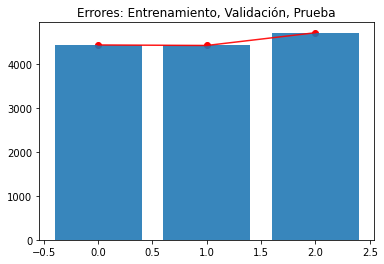

In [476]:
plt.bar([0,1,2],errores, alpha = .89)
plt.plot([0,1,2],errores, c = "red", alpha = .9)
plt.scatter([0,1,2],errores, c = "red", alpha = 1)

plt.title("Errores: Entrenamiento, Validación, Prueba")

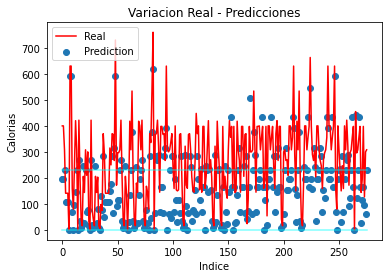

In [477]:
y_pred = round(h1(data['Lipidos (g)'], data['Proteinas (g)'], theta))
aux = list(range(0, len(data)))

plt.scatter(aux, y_pred, label ='Prediction')
plt.plot(aux, data['Calorias (Cal)'], c = "red", label ='Real')
plt.legend(loc ="upper left");

plt.plot(aux, [0] * len(data), c = "cyan", alpha = 0.5)
plt.plot(aux, [230] * len(data), c = "cyan", alpha = 0.5)

plt.title('Variacion Real - Predicciones')
plt.ylabel("Calorias")
plt.xlabel("Indice")
plt.show()

Finalmente podemos decir que esta relación de alto bias y una variación media, nos indica la existencia de **underfitt** en el modelo.
A raíz de ello, y como se vio a lo largo del curso, para manejar este problema del bajo ajuste del modelo a los datos, se aumentara la complejidad del modelo, para ello se añadiran características que brindaran mayor información para la generación de un modelo más ajustado, así como se ajustaran los hiperparámetros.

Text(0, 0.5, 'Calorías')

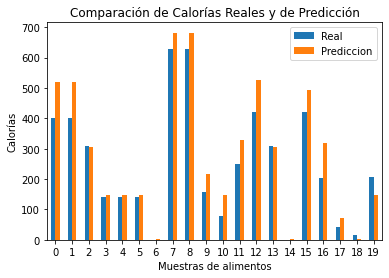

In [478]:
a = comp_table[['Real', 'Prediccion']].head(20)
a.plot.bar(rot=0)

plt.title("Comparación de Calorías Reales y de Predicción")
plt.xlabel("Muestras de alimentos")
plt.ylabel("Calorías")

# Generacion del modelo Optimizado
### Regresión Lineal **Gradiente Descendente**

Añadimos las variables que entregaran más informacion al modelo.

In [479]:
# Funcion de Hipotesis
h = lambda x0, x1, x2, x3, theta: theta[0] + theta[1] *x0 + theta[2] *x1 + theta[3] *x2 + theta[4] *x3

# Funcion auxiliar (parcial) de la funcion de costo
j_i = lambda x0, x1, x2, x3, y, theta: (h(x0, x1, x2, x3, theta)-y)**2

Obtenemos los datos nuevos a utilizar:

In [480]:
x3_train = x_train['Proteinas (g)']
x4_train = x_train['Sodio (g)']

x3_val = x_val['Proteinas (g)']
x4_val = x_val['Sodio (g)']

x3_test = x_test['Proteinas (g)']
x4_test = x_test['Sodio (g)']

In [481]:
# Parametros e hiper-parametros
theta = [0,4,8,3,-2]
alpha = 0.0000000065

n_iter = 10000

In [482]:
# Ciclo para iterar n catidad de veces sobre el modelo
for idx in range(n_iter):
  acumDelta0 = []
  acumDelta1 = []
  acumDelta2 = []
  acumDelta3 = []
  acumDelta4 = []
  
  for x1, x2, x3, x4, y in zip(x1_train, x2_train, x3_train, x4_train, y_train):
    acumDelta0.append(h(x1, x2, x3, x4, theta) - y)
    acumDelta1.append(h(x1, x2, x3, x4, theta) - y * x1)
    acumDelta2.append(h(x1, x2, x3, x4, theta) - y * x2)
    acumDelta3.append(h(x1, x2, x3, x4, theta) - y * x3)
    acumDelta4.append(h(x1, x2, x3, x4, theta) - y * x4)

  # Sumatoria de los deltas calculados anteriormente, que se emplearan para calcular los nuevos thetas
  sum_j0 = sum(acumDelta0)
  sum_j1 = sum(acumDelta1)
  sum_j2 = sum(acumDelta2)
  sum_j3 = sum(acumDelta3)
  sum_j4 = sum(acumDelta4)

  # Calculo de los nuevos thetas (coeficientes del modelo)
  theta[0] = theta[0] - alpha / n_train * sum_j0
  theta[1] = theta[1] - alpha / n_train * sum_j1
  theta[2] = theta[2] - alpha / n_train * sum_j2
  theta[3] = theta[3] - alpha / n_train * sum_j3
  theta[4] = theta[4] - alpha / n_train * sum_j4

# Impresion de los thetas obtenidos finalmente
print('Thetas calculados:', theta)

Thetas calculados: [0.0008566099408843958, 4.70270171297117, 8.254737312971152, 3.2281203250923927, -2.0047326860894197]


## Validacion del modelo

In [483]:
# Calculo de Error de los datos de entrenamiento
acum_delta = []
errores = []

for x1, x2, x3, x4, y in zip(x1_train, x2_train, x3_train, x4_train, y_train):
  acum_delta.append(j_i(x1, x2, x3, x4, y, theta)) 

sDelta = sum(acum_delta)  
j_train = 1/(2*n_train) * sDelta
errores.append(j_train)

# Calculo de Error con los datos de validacion
acum_delta = []
for x1, x2, x3, x4, y in zip(x1_val, x2_val, x3_val, x4_val, y_val):
  acum_delta.append(j_i(x1, x2, x3, x4, y, theta))  

sum_delta = sum(acum_delta)  
j_val = 1/(2*n_val)*sum_delta
errores.append(j_val)

# Calculo de Error con los datos de prueba
acum_delta = []
for x1, x2, x3, x4, y in zip(x1_test, x2_test, x3_test, x4_test, y_test):
  acum_delta.append(j_i(x1, x2, x3, x4, y, theta))  

sum_delta = sum(acum_delta)  
j_test = 1/(2*n_test)*sum_delta
errores.append(j_test)

# Impresion del Error con los datos de entrenamiento
print('Error de entrenamiento:', j_train)


# Impresion del Error de validacion
print('Error de validacion:', j_val)

# Impresion del Error de prueba
print('\nError de prueba:', j_test)

Error de entrenamiento: 242.73001666041824
Error de validacion: 242.67793104950277

Error de prueba: 214.98745055718473


# Analisis

Error de entrenamiento: 242.7300

Error de validacion: 242.6779

Podemos observar que el sesgo de nuesmo modelo bajo notablemente gracias que se realiazó un modelo más complejo, en la siguiente gráfica podemos observar evidentemente que los datos de predicción se encuntran mucho más apegados a la recta deseada.

In [484]:
y_pred = round(h(data['Carbohidratos (g)'], data['Lipidos (g)'], data['Proteinas (g)'] , data['Sodio (g)'], theta))
comp_table = pd.DataFrame({'Real': data['Calorias (Cal)'], 'Prediccion': y_pred, 'Diferencia / Sesgo': data['Calorias (Cal)'] - y_pred})

Text(0.5, 0, 'Valor Real')

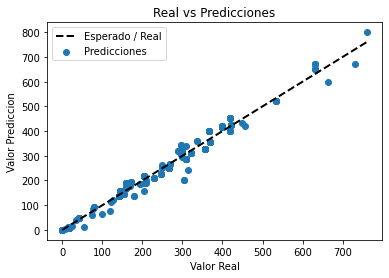

In [485]:
plt.scatter(data['Calorias (Cal)'], y_pred, label = "Predicciones")
plt.plot([min_val, max_val], [min_val, max_val], 'k--', color = 'black', lw=2, label = "Esperado / Real")
plt.legend(loc ="upper left");

plt.title('Real vs Predicciones')
plt.ylabel("Valor Prediccion")
plt.xlabel("Valor Real")

Por otro lado, en la tabla podemos observar las numerarias del sesgo mucho más pequeñas comparadas con la tabla del primer modelo

In [486]:
comp_table.head(10)

,Real,Prediccion,Diferencia / Sesgo
0,400,415.0,-15.0
1,400,415.0,-15.0
2,308,289.0,19.0
3,141,136.0,5.0
4,141,136.0,5.0
5,141,136.0,5.0
6,0,-0.0,0.0
7,630,671.0,-41.0
8,630,671.0,-41.0
9,159,168.0,-9.0


Respecto a la **variación** podemos observar en las gráficas una vez más que esta se mantiene como baja, pues los errores son muy parecidos en los 3 conjuntos de datos, el modelo reacciona de forma similar para cualquier conjunto de datos.

Text(0.5, 1.0, 'Errores: Entrenamiento, Validación, Prueba')

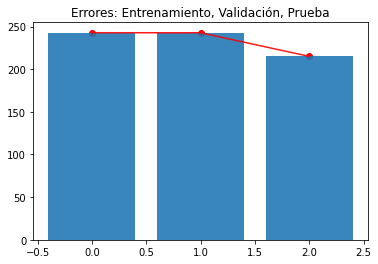

In [487]:
plt.bar([0,1,2],errores, alpha = .89)
plt.plot([0,1,2],errores, c = "red", alpha = .9)
plt.scatter([0,1,2],errores, c = "red", alpha = 1)

plt.title("Errores: Entrenamiento, Validación, Prueba")

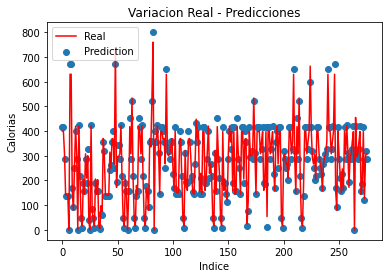

In [488]:
aux = list(range(0, len(data)))

plt.scatter(aux, y_pred, label ='Prediction')
plt.plot(aux, data['Calorias (Cal)'], c = "red", label ='Real')
plt.legend(loc ="upper left");


plt.title('Variacion Real - Predicciones')
plt.ylabel("Calorias")
plt.xlabel("Indice")
plt.show()

Finalmente observamos una gráfica de comparaciones entre los valores reales y los predichos donde se puede observar un mejora muy notable con respecto al primer modelo luego de haber tratado con el sesgo de la manera correcta.

Text(0, 0.5, 'Calorías')

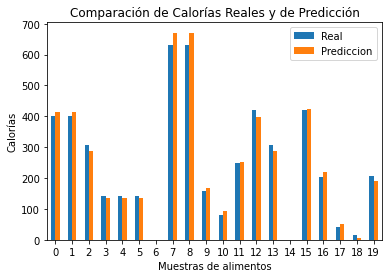

In [489]:
a = comp_table[['Real', 'Prediccion']].head(20)
a.plot.bar(rot=0)

plt.title("Comparación de Calorías Reales y de Predicción")
plt.xlabel("Muestras de alimentos")
plt.ylabel("Calorías")